# Solving Sudoku Puzzles
## Assignment Preamble
Please ensure you carefully read all of the details and instructions on the assignment page, this section, and the rest of the notebook. If anything is unclear at any time please post on the forum or ask a tutor well in advance of the assignment deadline.

In addition to all of the instructions in the body of the assignment below, you must also follow the following technical instructions for all assignments in this unit. *Failure to do so may result in a grade of zero.*
* [At the bottom of the page](#Submission-Test) is some code which checks you meet the submission requirements. You **must** ensure that this runs correctly before submission.
* Do not modify or delete any of the cells that are marked as test cells, even if they appear to be empty.
* Do not duplicate any cells in the notebook – this can break the marking script. Instead, insert a new cell (e.g. from the menu) and copy across any contents as necessary.

Remember to save and backup your work regularly, and double-check you are submitting the correct version.

This notebook is the primary reference for your submission. You may write code in separate `.py` files but it must be clearly imported into the notebook so that it runs without needing to reference those files, and you must explain clearly what functionality is contained in those files (through comments, markdown cells, etc).

As always, **the work you submit for this assignment must be entirely your own.** Do not copy or work with other students. Do not copy answers that you find online. These assignments are designed to help improve your understanding first and foremost – the process of doing the assignment is part of *learning*. They are also used to assess your ability, and so you must uphold academic integrity. Submitting plagiarised work risks your entire place on your degree.

**The pass mark for this assignment is 40%.** We expect that students, on average, will be able to produce a submission which gets a mark between 50-70% within the normal workload allocation for the unit, but this will vary depending on individual backgrounds. Please ask for help if you are struggling.

## Getting Started
For this assignment, you will be writing an agent that can solve sudoku puzzles. You should be familiar with sudoku puzzles from the unit material. You are given a 9x9 grid with some fixed values. To solve the puzzle, the objective is to fill the empty cells of the grid such that the numbers 1 to 9 appear exactly once in each row, column, and 3x3 block of the grid. 

Below is a sample puzzle along with its solution. 

<img src="images/sudoku.png" style="width: 50%;"/>

For this assignment you will need to submit:
1. The implementation for an agent which can solve sudoku puzzles – this notebook
 * You can use any algorithm you like, from the unit material or otherwise
 * Your code will be subject to automated testing, from which grades will be assigned based on whether it can solve sudokus of varying difficulty
 * To get a high grade on this assignment, the speed of your code will also be a factor – the quicker the better
 * There are some sample tests included below, make sure your code is compatible with the format of these tests
2. A text file that explains your approach and the decisions you made in your own words – a readme file
 * Submissions that do not include the written section will receive zero marks – **this part is mandatory**
 * You may write your file in plain text (.txt) or [Markdown](https://www.markdownguide.org/basic-syntax/) (.md)
 * To get top marks on this assignment, as well as getting a high grade from your implementation, you must also demonstrate excellent academic presentation in your written section

### Choice of Algorithm
The choice of algorithm to solve sudoku puzzles is up to you. We expect you will use search techniques from the unit, but you could make something up yourself, or do some independent research to find something else. You will need to evaluate and balance the trade-off between how well suited you think the algorithm is and how difficult it is to write, but there is some advice below.

I suggest you implement *constraint satisfaction* as it is described in the unit material. You can use the code you have previously been given as a guide. A good implementation of a backtracking depth-first search with constraint propagation should be sufficient to get a good grade in the automated tests (roughly 60-70%).

You could also write a successful agent that uses the other search techniques you have seen in the unit so far: basic search, heuristic search, or local search. You may find these easier to implement, though they may perform less well. 

To get a high grade on this assignment will require a particularly efficient implementation of constraint satisfaction, or something which goes beyond the material we have presented. *This is left unguided and is not factored into the unit workload estimates.*

If you choose to implement more than one algorithm, please feel free to include your code and write about it in part two (readme file), but only the code in this notebook will be used in the automated testing.

## Sample Sudoku Puzzles
To get started, the cell below will load in some sample sudoku puzzles for you so you can see the format. There are sudokus provided of multiple difficulties (easier sudokus typically start with more digits provided). The cell below only loads the easiest, but there is another test cell lower in the notebook which will run your code against all of the provided puzzles.

Each sudoku is a 9x9 NumPy array of integers, where zero represents an empty square. Each difficulty comes with 15 sudokus, so when you load the file, it is stored in a 15x9x9 array.

In [1]:
import numpy as np

# Load sudokus
sudoku = np.load("data/very_easy_puzzle.npy")
print("very_easy_puzzle.npy has been loaded into the variable sudoku")
print(f"sudoku.shape: {sudoku.shape}, sudoku[0].shape: {sudoku[0].shape}, sudoku.dtype: {sudoku.dtype}")

# Load solutions for demonstration
solutions = np.load("data/very_easy_solution.npy")
print()

# Print the first 9x9 sudoku...
print("First sudoku:")
print(sudoku[0], "\n")

# ...and its solution
print("Solution of first sudoku:")
print(solutions[0])

very_easy_puzzle.npy has been loaded into the variable sudoku
sudoku.shape: (15, 9, 9), sudoku[0].shape: (9, 9), sudoku.dtype: int8

First sudoku:
[[1 0 4 3 8 2 9 5 6]
 [2 0 5 4 6 7 1 3 8]
 [3 8 6 9 5 1 4 0 2]
 [4 6 1 5 2 3 8 9 7]
 [7 3 8 1 4 9 6 2 5]
 [9 5 2 8 7 6 3 1 4]
 [5 2 9 6 3 4 7 8 1]
 [6 0 7 2 9 8 5 4 3]
 [8 4 3 0 1 5 2 6 9]] 

Solution of first sudoku:
[[1 7 4 3 8 2 9 5 6]
 [2 9 5 4 6 7 1 3 8]
 [3 8 6 9 5 1 4 7 2]
 [4 6 1 5 2 3 8 9 7]
 [7 3 8 1 4 9 6 2 5]
 [9 5 2 8 7 6 3 1 4]
 [5 2 9 6 3 4 7 8 1]
 [6 1 7 2 9 8 5 4 3]
 [8 4 3 7 1 5 2 6 9]]


## Part One
You should write all of your code for solving sudokus below this cell.

You must include a function called `sudoku_solver(sudoku)` which takes one sudoku puzzle (a 9x9 NumPy array) as input, and returns the solved sudoku as another 9x9 NumPy array. This is the function which will be tested. 

In [175]:
class Sudoku:
    def __init__(self):
        self.sudoku_temp = []
        self.solved_sudoku = []
        self.grid = []
#         self.cycles = 0
        self.counts = dict()


    #check to see if value in cell is possible under constraints
    def possible(self,y, x, n):
        
        # check row/column for number
        if n in self.sudoku_temp[:][y]:
            return False
        if n in self.sudoku_temp[:, x]:
            return False
        
        # check block
        for i in range(3):
            for j in range(3):
                if self.sudoku_temp[(y // 3) * 3 + i][(x // 3) * 3 + j] == n:
                    return False
        return True


    def check_if_valid(self,sudoku_line):
        list1 = np.arange(1, 10)
        return all(int(elem) in sudoku_line for elem in list1)

    #Check Sudoku
    def checker(self):
        # Check board has iterated
        if len(self.solved_sudoku) == 0:
            #print('BOARD WRONG')
            #print(self.solved_sudoku)
            return True

        board = self.solved_sudoku.copy()
        
        # Check Row
        for i in range(9):
            if not self.check_if_valid(board[i]):
                #print('ROW WRONG')
                return True
            # Check Column
            cols = np.transpose(board)
            if not self.check_if_valid(cols[i]):
                #print('COLUMN WRONG')
                return True
        # Check Block
        square_size = 3
        for i in range(9):
            square_r, square_c = divmod(i, square_size)
            square = board[square_r * square_size:(square_r + 1) * square_size,
                    square_c * square_size:(square_c + 1) * square_size]
            if not self.check_if_valid(square.reshape(9)):
                #print('BLOCK WRONG')
                return True
            
        #Valid Board
        #print('VALID BOARD')
        return False


    def pre_processing(self):
        #count zeros
        
        for i in self.sudoku_temp:
            for ii in i:
                self.counts[ii] = self.counts.get(ii, 0) + 1 
        counts=sorted(self.counts, key=self.counts.get, reverse=True)
        
        #build grid
        self.grid = [[y, x] for x in range(9) for y in range(9) if self.sudoku_temp[x][y]==0]
        """
        Cell[0] => Column
        Cell[1] => Row
        Cell[2] => Possible Entries for Cell
                   Sorted by the values with the most numbers on the board first.
                   e.g If there are more 9's on the board than any other number, 9's will be trialled first on each iteration
                   (as long as 9 is a possible number)
        However if the board is over 2/3rds 0's (arbitrary), then the grid is sorted so the cells with the least possible values are trialled first.
        """
        remove_list = []
        for cell in self.grid:
            
            #find numbers in the block
            cellnumbers = [self.sudoku_temp[(cell[1] // 3) * 3 + i][(cell[0] // 3) * 3 + j] for i in range(3) for j in range(3)]

            #if there are any rows with only one solution they are filled in
            cellnumbers_row = self.sudoku_temp[:][cell[1]]
            if np.count_nonzero(cellnumbers_row==0)==1:
                self.sudoku_temp[cell[1]][np.where(cellnumbers_row == 0)[0][0]] = [i for i in range(1, 10) if i not in cellnumbers_row][0]
                remove_list.append(cell)
                continue
            
            #if there are any columns with only one solution they are filled in
            cellnumbers_col = self.sudoku_temp[:, cell[0]]
            if np.count_nonzero(cellnumbers_col==0)==1:
                self.sudoku_temp[np.where(cellnumbers_col == 0)[0][0],cell[0]] = [i for i in range(1, 10) if i not in cellnumbers_col][0]
                remove_list.append(cell)
                continue
                
            #find possible values for each cell
            nums = list(set(np.concatenate((cellnumbers_row, cellnumbers_col, cellnumbers), axis=None)))
            nums = [i for i in range(1, 10) if i not in [int(num) for num in nums]]
            if sorted(self.counts.items())[0][1]%60!=0:
                nums = [i for i in counts if i in nums]
                nums_ordered = set()
                for x in nums:
                    nums_ordered.add(x)
                cell += [list(nums_ordered)]
            else:
                cell += [list(nums)]
            if len(cell[2])==1:
                self.sudoku_temp[cell[1]][cell[0]]=cell[2][0]
                remove_list.append(cell)
                continue
        

            
        #remove cells that have just been filled and sort grid
        self.grid = [i for i in self.grid if i not in remove_list]
        if sorted(self.counts.items())[0][1]>=60 and sorted(self.counts.items())[1][0]==1 :
            self.grid = sorted(self.grid, key=lambda x: len(x[2]), reverse=False)
        
        #if any are removed, pre_process again. Not optimised but cuts some time down for the beefier sudokus
        if len(remove_list)>0:
            self.counts = dict()
            self.pre_processing()
 
    #Solve Sudoku
    def solver(self):                 
        for cell in self.grid:
            if self.sudoku_temp[cell[1]][cell[0]] == 0:
                for n in cell[2]:
                    if self.possible(cell[1], cell[0], n):
                        self.sudoku_temp[cell[1]][cell[0]] = n
                        #self.cycles+=1
                        if self.solver():
                            return True
                        else:
                            self.sudoku_temp[cell[1]][cell[0]] = 0
                return False        
        self.solved_sudoku = self.sudoku_temp.copy()
        return True


    def _sudoku_solver_(self,sudoku_init):
        self.sudoku_temp = sudoku_init
#         for i in self.sudoku_temp:
#             self.zeros += list(i).count(0)
        
        self.pre_processing()
        #self.pre_processing()
        
        #check if solved from pre_processing
        if len(self.grid)!=0:
            self.solver()
        else:
            self.solved_sudoku = self.sudoku_temp.copy()
            
        #check answer
        test = self.checker()
        if test:
            return np.full((9, 9), -1.)#, self.cycles,self.zeros
        else:
            return self.solved_sudoku#, self.cycles,self.zeros
        
def sudoku_solver(initial_sudoku):
    """
    Solves a Sudoku puzzle and returns its unique solution.

    Input
        sudoku : 9x9 numpy array
            Empty cells are designated by 0.

    Output
        9x9 numpy array of integers
            It contains the solution, if there is one. If there is no solution, all array entries should be -1.
    """
    instance=Sudoku()
    return instance._sudoku_solver_(initial_sudoku)

All of your code must go above this cell. You may add additional cells into the notebook if you wish, but do not duplicate or copy/paste cells as this can interfere with the grading script.

### Testing Details
There are four difficulties of sudoku provided: very easy, easy, medium, and hard. There are 15 sample sudokus in each category, with solutions as well. Difficulty was determined using reference solvers, but your code may vary; it is conceivable that your code will find some sudokus much easier or harder within a given category, or even between categories.

*All categories that are easy and above will contain* ***invalid initial states***, that is, sudoku puzzles with no solution. In this case, your function should return a 9x9 NumPy array whose values are all equal to -1.

When we test your code, we will firstly test it on the *same* very easy puzzles that you have been given. Then we will test it on additional *hidden* sudokus from each difficulty in turn, easy and up. Grades are awarded based on whether your code can solve the puzzles. For high grades on the hard puzzles, execution time will also be a factor. 

All puzzles must take under 30 seconds each on the test machine to count as successful, but you should be aiming for an average of under a second per puzzle. Hardware varies, but all tests will take place on the same modern desktop machine. Our ‘standard constraint satisfaction’ implementation takes about 0.001 seconds per puzzle for the very easy category, but struggles to solve some of the hard puzzles within the time limit.

***The hard sudokus are labelled as hard for a reason.*** We expect most submissions will not be able to solve them in a reasonable length of time. Use the stop button (■) on the toolbar if you need to terminate your code because it is taking too long.

The best way to improve the performance of your code is through a detailed understanding and smart choice of AI algorithms. This assignment is ***not*** meant to test your ability to write multi-threaded code or any other kind of high-performance code optimisations. 

#### Test Cell
The following code will run your solution over the provided sudoku puzzles. To enable it, set the constant `SKIP_TESTS` to `False`. If you fail any tests of one difficulty, the code will stop, but you can modify this behaviour if you like.

**IMPORTANT**: you must set `SKIP_TESTS` back to `True` before submitting this file!

In [176]:
SKIP_TESTS = False
stringy = ""
difficulty_list=[]
problem =[]
times = []
iterations = []
zeros_list = []

if not SKIP_TESTS:
    import time
    difficulties = ['very_easy', 'easy', 'medium', 'hard']

    for difficulty in difficulties:
        print(f"Testing {difficulty} sudokus")
        
        sudokus = np.load(f"data/{difficulty}_puzzle.npy")
        solutions = np.load(f"data/{difficulty}_solution.npy")
        
        count = 0
        for i in range(len(sudokus)):
            sudoku = sudokus[i].copy()
            print(f"This is {difficulty} sudoku number", i)
            print(sudoku)
            start_time = time.process_time()
            your_solution = sudoku_solver(sudoku)
            end_time = time.process_time()
            
            print(f"This is your solution for {difficulty} sudoku number", i)
            print(your_solution)
            
            print("Is your solution correct?")
            if np.array_equal(your_solution, solutions[i]):
                print("Yes! Correct solution.")
                count += 1
            else:
                print("No, the correct solution is:")
                print(solutions[i])
            
            print("This sudoku took", end_time - start_time, "seconds to solve",'\n')
            stringy += difficulty + " problem-" + str(i) + " took " + str(end_time - start_time) + " seconds to solve and "+str(cycles)+ " iterations. Starting sudoku contains "+str(zeros)+" zeros \n\n"
            difficulty_list.append(difficulty)
            problem.append(i)
            times.append(end_time - start_time)
            iterations.append(cycles)
            zeros_list.append(zeros)
        stringy+= f"{count}/{len(sudokus)} {difficulty} sudokus correct"+'\n'
        print(f"{count}/{len(sudokus)} {difficulty} sudokus correct")
        print(stringy)
        if count < len(sudokus):
            print(stringy)
            break

Testing very_easy sudokus
This is very_easy sudoku number 0
[[1 0 4 3 8 2 9 5 6]
 [2 0 5 4 6 7 1 3 8]
 [3 8 6 9 5 1 4 0 2]
 [4 6 1 5 2 3 8 9 7]
 [7 3 8 1 4 9 6 2 5]
 [9 5 2 8 7 6 3 1 4]
 [5 2 9 6 3 4 7 8 1]
 [6 0 7 2 9 8 5 4 3]
 [8 4 3 0 1 5 2 6 9]]


ValueError: too many values to unpack (expected 3)

## Submission Test
The following cell tests if your notebook is ready for submission. **You must not skip this step!**

Restart the kernel and run the entire notebook (Kernel → Restart & Run All). Now look at the output of the cell below. 

*If there is no output, then your submission is not ready.* Either your code is still running (did you forget to skip tests?) or it caused an error.

As previously mentioned, failing to follow these instructions can result in a grade of zero.

In [128]:
import pandas as pd
d = {'Difficulty':difficulty_list,'Problem No':problem,'Time':times,'Iterations':iterations,'Missing Values':zeros_list}
df = pd.DataFrame(d)
# df['Diff Prob'] = 
temp = []
for i,item in enumerate(problem):
    temp.append(difficulty_list[i]+" "+str(item))
df['Sudoku'] = temp
df

p = []
for i, item in enumerate(df['Sudoku']):
    if "very" in item:
        p.append("teal")
    elif "easy" in item:
        p.append("lightseagreen")
    elif "medium" in item:
        p.append("mediumturquoise")
    elif "hard" in item:
        p.append("paleturquoise")
palette = dictionary = dict(zip(df['Sudoku'], p))
palette
df

,Difficulty,Problem No,Time,Iterations,Missing Values,Sudoku
0,very_easy,0,0.015625,0,5,very_easy 0
1,very_easy,1,0.000000,0,5,very_easy 1
2,very_easy,2,0.000000,0,5,very_easy 2
3,very_easy,3,0.000000,0,5,very_easy 3
4,very_easy,4,0.000000,0,5,very_easy 4
5,very_easy,5,0.000000,0,5,very_easy 5
6,very_easy,6,0.000000,0,5,very_easy 6
7,very_easy,7,0.000000,0,5,very_easy 7
8,very_easy,8,0.000000,0,5,very_easy 8
9,very_easy,9,0.000000,0,5,very_easy 9


<ipython-input-129-537df294e7d5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels =df["Sudoku"], rotation=90)


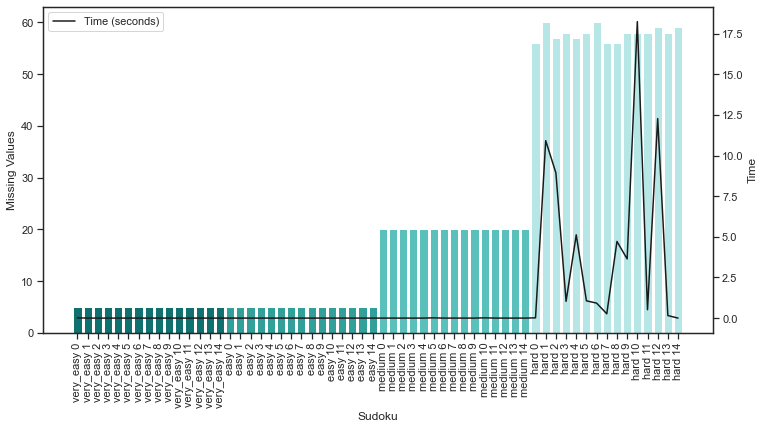

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax1 = sns.set_style(style=None, rc=None )
ax1 = sns.set_theme(style="ticks")
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()




# ax = sns.barplot(data=a, x='Scenario', y='Duration', hue='Program', palette=palette)
sns.set_color_codes("pastel")
g= sns.barplot(x="Sudoku", y="Missing Values", data=df,
            label="Zeros", palette=palette,ax=ax1)

sns.set_color_codes("muted")
sns.lineplot(x="Sudoku", y="Time", data=df,
            label="Time (seconds)", color="k" ,ax=ax2)
g.set_xticklabels(labels =df["Sudoku"], rotation=90)
#sns.set_xticklabels(90)
ax2.grid(False)
plt.show()

<ipython-input-169-5e4c7e8fd6f8>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels =df["Sudoku"], rotation=90)


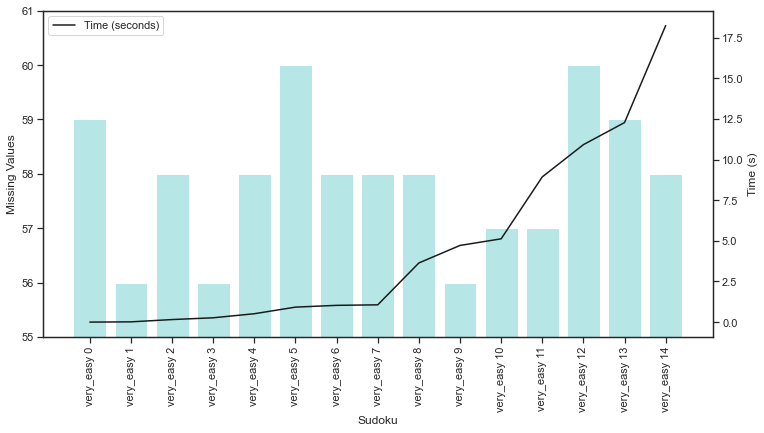

In [169]:
df2 = df.loc[df['Difficulty'] == 'hard']
df2 = df2.sort_values(by=['Time'])
df2

ax1 = sns.set_theme(style="ticks")
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()




# ax = sns.barplot(data=a, x='Scenario', y='Duration', hue='Program', palette=palette)
sns.set_color_codes("pastel")
g= sns.barplot(x="Sudoku", y="Missing Values", data=df2,
            label="Zeros", palette=palette,ax=ax1)

sns.set_color_codes("muted")
g2=sns.lineplot(x="Sudoku", y="Time", data=df2,
            label="Time (seconds)", color="k" ,ax=ax2)
g.set_xticklabels(labels =df["Sudoku"], rotation=90)
g2.set(ylabel='Time (s)')
#sns.set_xticklabels(90)
ax2.grid(False)
ax1.set(ylim=(55, 61))
plt.show()

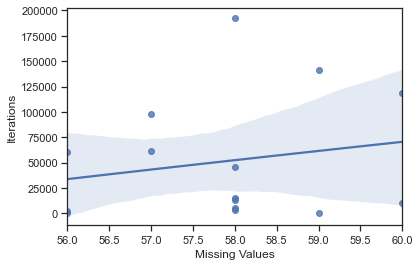

986.4039617444132 -8923.823692985608 0.33771478546597566 181.3795430476666 1.125037248235635e-06


In [173]:
sns.regplot(x="Missing Values", y="Iterations", data=df2,logx=True)
plt.show()

my_y = df["Iterations"]
my_x = df["Missing Values"]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(my_x, my_y)
print(slope,intercept,r_value**2,std_err,p_value)

10955.923598910918 347.4416569614714 0.9972566291534397 75.45252742500406


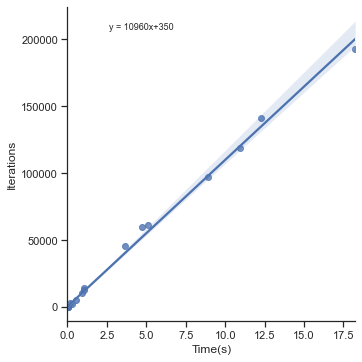

In [165]:
import scipy

my_y = df['Iterations']
my_x = df['Time']

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(my_x, my_y)
    
print(slope,intercept,r_value**2,std_err)
equation = "y = "+str(round(round(slope,-1)))+"x+"+str(round(round(intercept,-1)))
g=sns.lmplot(x="Time", y="Iterations", data=df)
g.fig.text(0.28, 0.9,equation, fontsize=9)
g.set(xlabel='Time (s)')
plt.show()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


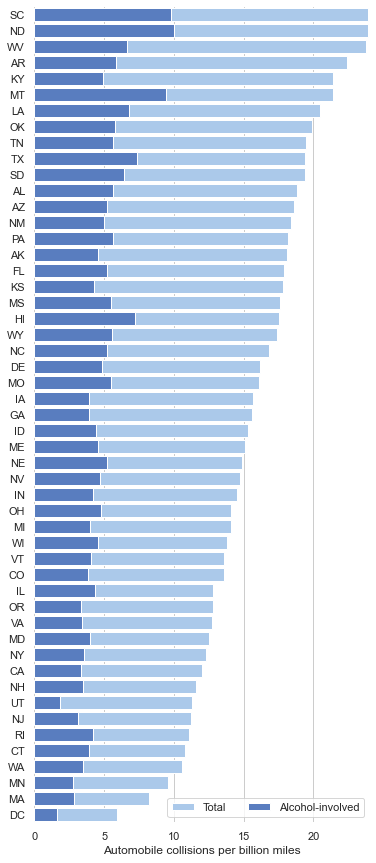

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
crashes

In [6]:
import sys
import pathlib

fail = False;

if not SKIP_TESTS:
    fail = True;
    print("You must set the SKIP_TESTS constant to True in the cell above.")
    
p1 = pathlib.Path('./readme.txt')
p2 = pathlib.Path('./readme.md')
if not (p1.is_file() or p2.is_file()):
    fail = True;
    print("You must include a separate file called readme.txt or readme.md in your submission.")
    
p3 = pathlib.Path('./sudoku.ipynb')
if not p3.is_file():
    fail = True
    print("This notebook file must be named sudoku.ipynb")
    
if "sudoku_solver" not in dir():
    fail = True;
    print("You must include a function called sudoku_solver which accepts a numpy array.")
else: 
    sudoku = np.load("data/very_easy_puzzle.npy")[0]
    solution = np.load("data/very_easy_solution.npy")[0]

    if not np.array_equal(sudoku_solver(sudoku), solution):
        print("Warning:")
        print("Your sudoku_solver function does not correctly solve the first sudoku.")
        print()
        print("Your assignment is unlikely to get any marks from the autograder. While we will")
        print("try to check it manually to assign some partial credit, we encourage you to ask")
        print("for help on the forum or directly to a tutor.")
        print()
        print("Please use the readme file to explain your code anyway.")
    
if fail:
    print()
    sys.stderr.write("Your submission is not ready! Please read and follow the instructions above.")
else:
    print("All checks passed. When you are ready to submit, upload the notebook and readme file to the")
    print("assignment page, without changing any filenames.")
    print()
    print("If you need to submit multiple files, you can archive them in a .zip file. (No other format.)")

You must set the SKIP_TESTS constant to True in the cell above.
Your sudoku_solver function does not correctly solve the first sudoku.

Your assignment is unlikely to get any marks from the autograder. While we will
try to check it manually to assign some partial credit, we encourage you to ask
for help on the forum or directly to a tutor.

Please use the readme file to explain your code anyway.



C:\Users\Keir\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
Your submission is not ready! Please read and follow the instructions above.

In [ ]:
# This is a TEST CELL. Do not delete or change.